In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

###Our goal is to use data from a mental health survey to explore factors that may cause individuals to experience depression
Link to the Kaggle competition: [Competition](https://www.kaggle.com/competitions/playground-series-s4e11)

#Data Overview

In [138]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [139]:
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [141]:
unique_val = {}
for col in train.columns:
    unique_val[col] = len(train[col].unique())

In [142]:
unique_val

{'id': 140700,
 'Name': 422,
 'Gender': 2,
 'Age': 43,
 'City': 98,
 'Working Professional or Student': 2,
 'Profession': 65,
 'Academic Pressure': 6,
 'Work Pressure': 6,
 'CGPA': 332,
 'Study Satisfaction': 6,
 'Job Satisfaction': 6,
 'Sleep Duration': 36,
 'Dietary Habits': 24,
 'Degree': 116,
 'Have you ever had suicidal thoughts ?': 2,
 'Work/Study Hours': 13,
 'Financial Stress': 6,
 'Family History of Mental Illness': 2,
 'Depression': 2}

<Axes: >

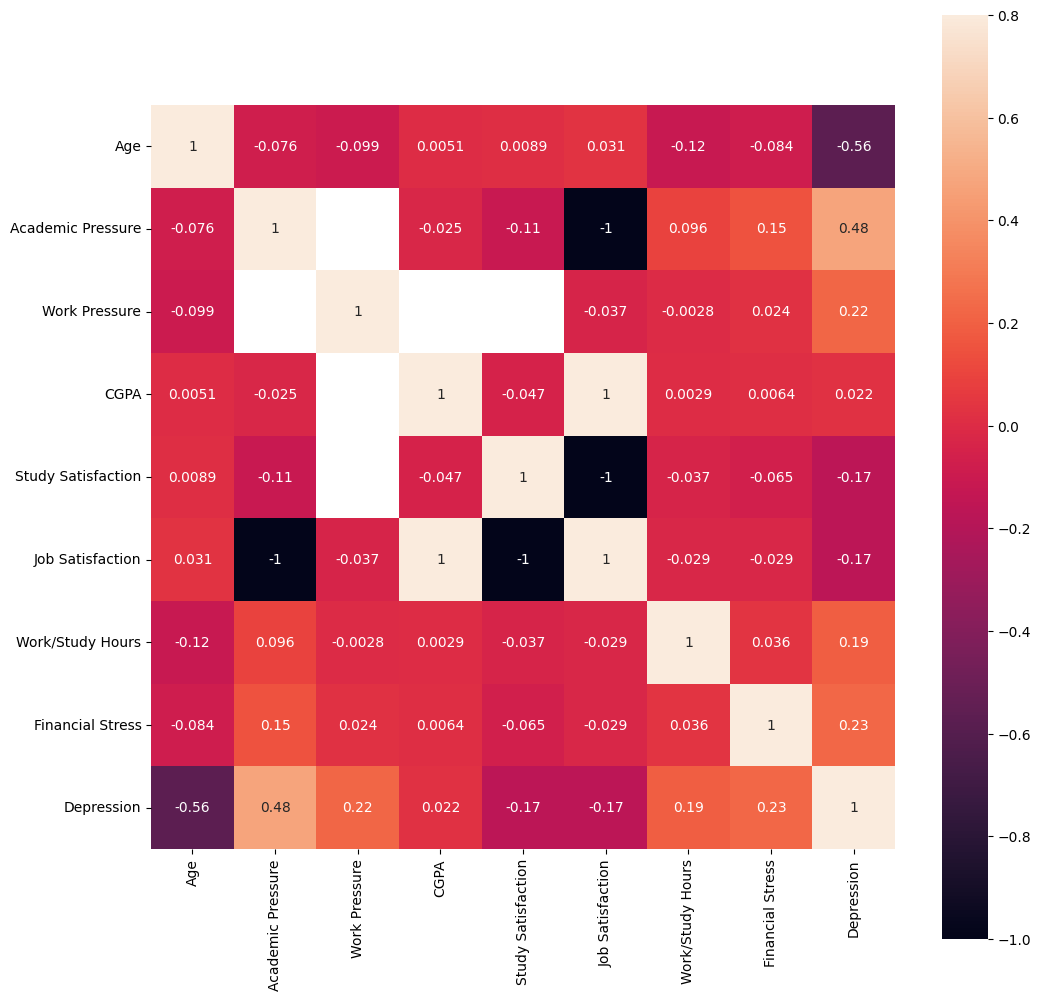

In [143]:
corrmat = train.drop(columns=["id"]).corr(numeric_only=True)
plt.figure(figsize=(12,12))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)

Let`s look at some of the numeric attributes

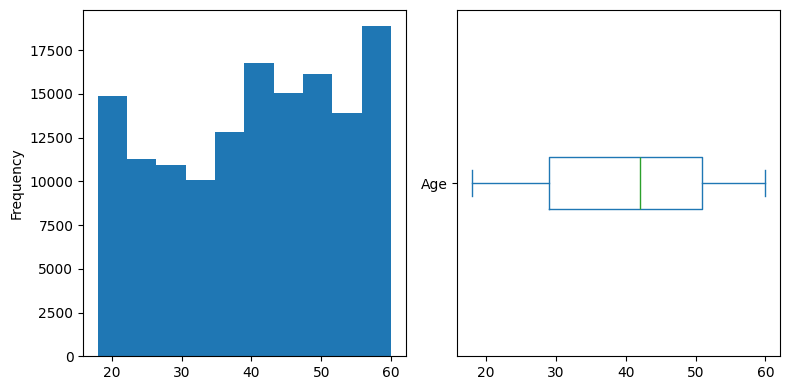

In [144]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
train.Age.plot.hist()

plt.subplot(1,2,2)
train.Age.plot.box(vert=False)

plt.tight_layout()
plt.show()

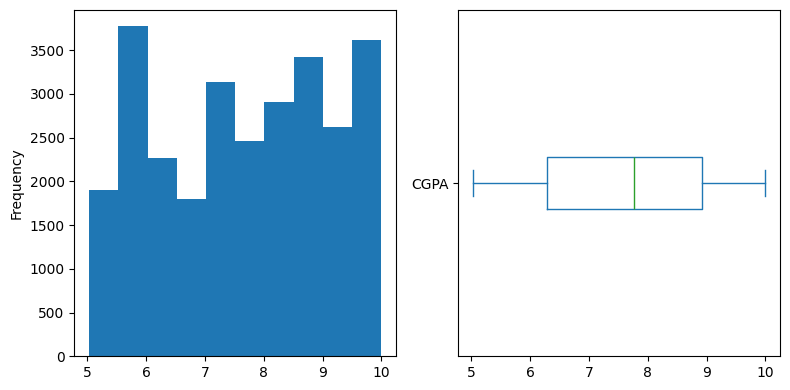

In [145]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
train.CGPA.plot.hist()

plt.subplot(1,2,2)
train.CGPA.plot.box(vert=False)

plt.tight_layout()
plt.show()

<Axes: xlabel='Age', ylabel='Depression'>

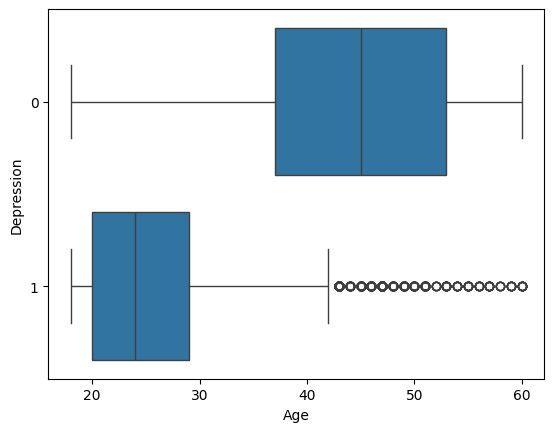

In [146]:
sns.boxplot(x = "Age", y = train["Depression"].astype("category"), data=train)

As we can see from boxplot above there is definitely a relation between the Age attribute and the target Depression attribute

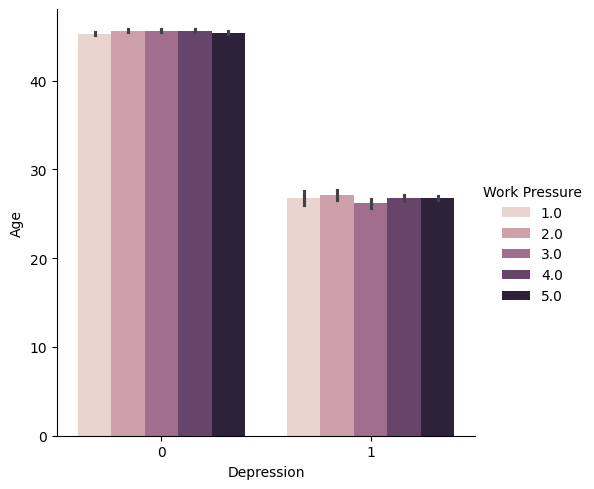

In [147]:
sns.catplot(y="Age", x="Depression", hue="Work Pressure", data=train, kind="bar") #3-dimension bar of the Age + Work Pressure vs Depression

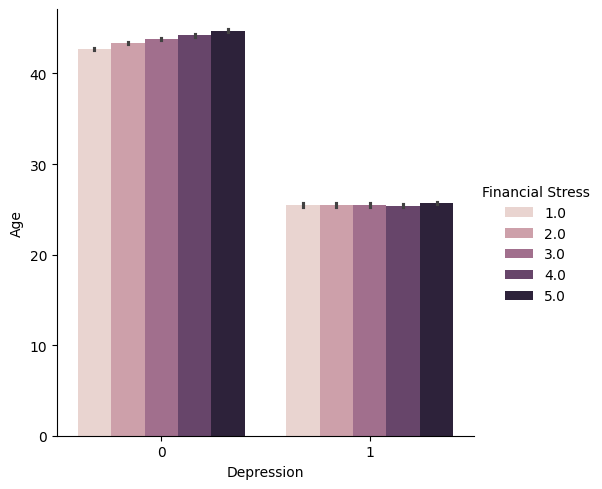

In [148]:
sns.catplot(y="Age", x="Depression", hue="Financial Stress", data=train, kind="bar") #3-dimension bar of the Age + Financial Stress vs Depression

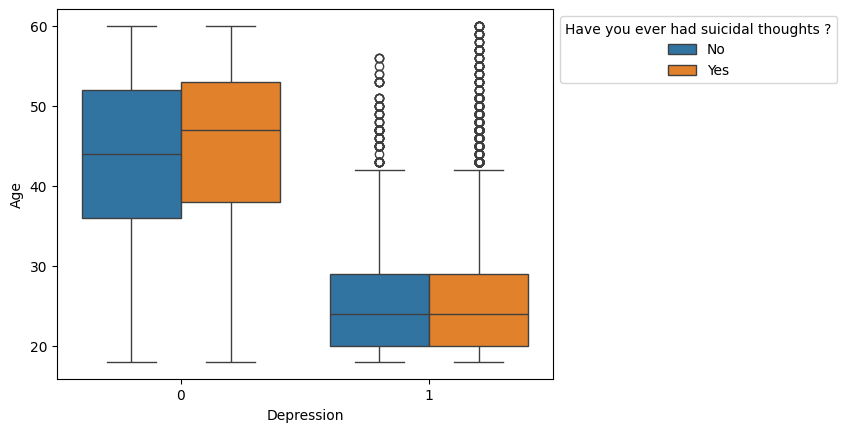

In [149]:
ax = sns.boxplot(y="Age", x="Depression", hue="Have you ever had suicidal thoughts ?", data=train)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

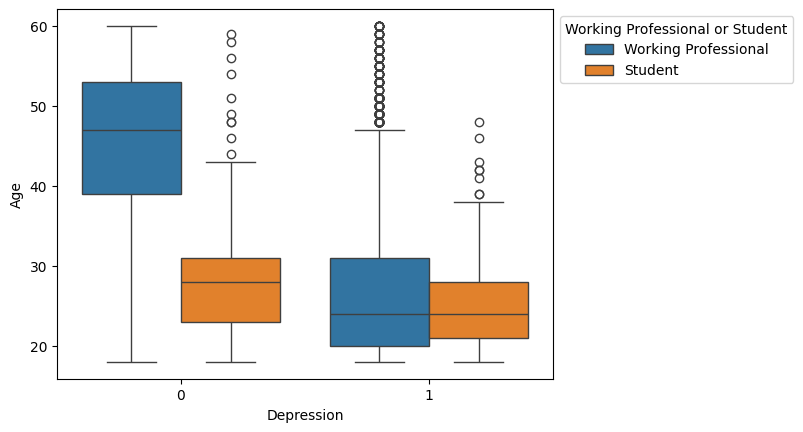

In [150]:
ax = sns.boxplot(y="Age", x="Depression", hue="Working Professional or Student", data=train)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

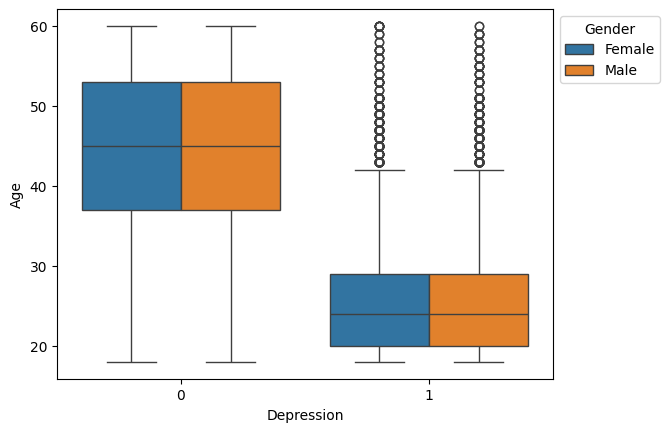

In [151]:
ax = sns.boxplot(y="Age", x="Depression", hue="Gender", data=train)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Let`s plot categorical vs Depression matrices

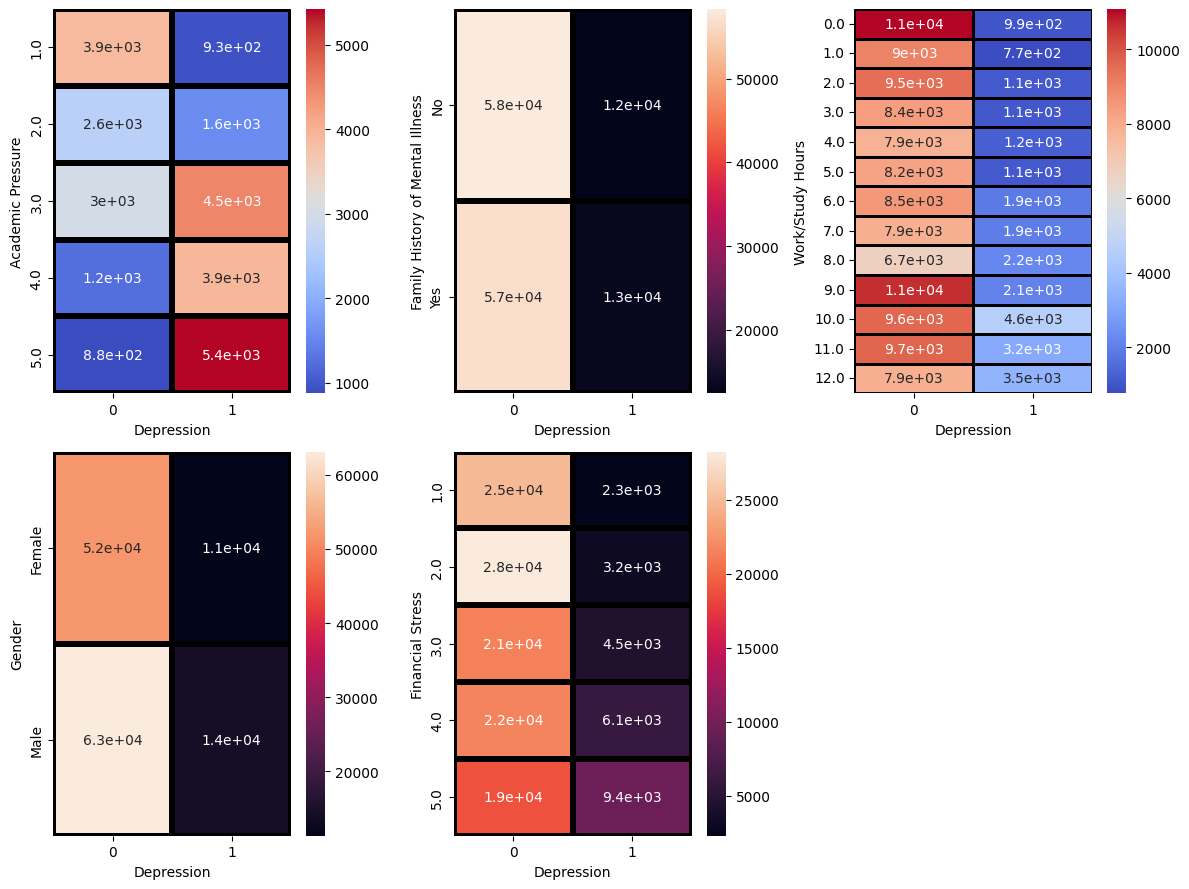

In [152]:
#Subplot 1 : Academic Pressure vs Depression
plt.figure(figsize=(12,9))
plt.subplot(2,3,1)
dep_ac = pd.crosstab(train["Academic Pressure"], train["Depression"])
sns.heatmap(dep_ac, annot=True, cmap= 'coolwarm', linewidths=3, linecolor='black')

#Subplot 2 : Family History of Mental Illnes vs Depression
plt.subplot(2,3,2)
dep_mi = pd.crosstab(train["Family History of Mental Illness"], train["Depression"])
sns.heatmap(dep_mi, annot=True, linewidths=3, linecolor='black')

#Subplot 3 : Work/Study Hours vs Depression
plt.subplot(2,3,3)
dep_ws = pd.crosstab(train['Work/Study Hours'], train["Depression"])
sns.heatmap(dep_ws, annot=True, cmap= 'coolwarm', linewidths=2, linecolor='black')

#Subplot 4 : Gender vs Depression
plt.subplot(2,3,4)
dep_gen = pd.crosstab(train['Gender'], train["Depression"])
sns.heatmap(dep_gen, annot=True, linewidths=3, linecolor='black')

#Subplot 5 : Financial Stress vs Depression
plt.subplot(2,3,5)
dep_gen = pd.crosstab(train['Financial Stress'], train["Depression"])
sns.heatmap(dep_gen, annot=True, linewidths=3, linecolor='black')

plt.tight_layout()
plt.show()

It can be seen from graphs above that there are some relations between independent variables and target attribute: Academic Pressure vs Depression, Work/Study Hours vs Depression, Gender vs Depression, Financial Stress vs Depression

#Data Preprocessing

In [153]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.Depression.values
df = pd.concat((train, test)).reset_index(drop=True)
df.drop(['Depression'], axis=1, inplace=True)

Dealing with missing values

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234500 entries, 0 to 234499
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     234500 non-null  int64  
 1   Name                                   234500 non-null  object 
 2   Gender                                 234500 non-null  object 
 3   Age                                    234500 non-null  float64
 4   City                                   234500 non-null  object 
 5   Working Professional or Student        234500 non-null  object 
 6   Profession                             173238 non-null  object 
 7   Academic Pressure                      46664 non-null   float64
 8   Work Pressure                          187804 non-null  float64
 9   CGPA                                   46664 non-null   float64
 10  Study Satisfaction                     46664 non-null   

In [155]:
df["Profession"].fillna("None", inplace=True) # null value means that person doesn`t have a job
df["Academic Pressure"].fillna(0.0, inplace=True) # null value means that person doesn`t study
df["Work Pressure"].fillna(0.0, inplace=True) # null value means that person doesn`t have a job
df["CGPA"].fillna(0.0, inplace=True) # null value means that person doesn`t study
df["Study Satisfaction"].fillna(0.0, inplace=True) # null value means that person doesn`t study
df["Job Satisfaction"].fillna(0.0, inplace=True) # null value means that person doesn`t have a job

<ipython-input-155-6e47177c6108>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Profession"].fillna("None", inplace=True) # null value means that person doesn`t have a job
<ipython-input-155-6e47177c6108>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doin

In [156]:
for att in ('Dietary Habits', 'Degree', 'Financial Stress'):
    df[att].fillna(df[att].mode()[0], inplace=True) #basically the same as most-frequent value

<ipython-input-156-4937d9a0c891>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[att].fillna(df[att].mode()[0], inplace=True) #basically the same as most-frequent value


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234500 entries, 0 to 234499
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     234500 non-null  int64  
 1   Name                                   234500 non-null  object 
 2   Gender                                 234500 non-null  object 
 3   Age                                    234500 non-null  float64
 4   City                                   234500 non-null  object 
 5   Working Professional or Student        234500 non-null  object 
 6   Profession                             234500 non-null  object 
 7   Academic Pressure                      234500 non-null  float64
 8   Work Pressure                          234500 non-null  float64
 9   CGPA                                   234500 non-null  float64
 10  Study Satisfaction                     234500 non-null  

In [158]:
df.drop(columns=["id", "Name", "City"], inplace=True) #drop unnecessary variables

In [159]:
ordinal = ['Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness'] #list of categorical attributes for ordinal encoding
one_hot = ['Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', "Gender"] #list of categorical attributes for one hot encoding


In [160]:
dummies = pd.get_dummies(df[one_hot], dtype=float) #one hot encoding
df = pd.concat([df, dummies], axis=1)
df.drop(columns= one_hot, inplace=True)

In [161]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [162]:
df[ordinal] = ordinal_encoder.fit_transform(df[ordinal]) #ordinal encoding

In [163]:
df = (df-df.min())/(df.max()-df.min()) #min max scaling

In [164]:
X_train = df[:ntrain] #defining X_train and X_test
X_test = df[ntrain:]

#Model selection

In [165]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [166]:
def model_grid(model, parameters, predictor=X_train,target=y_train): #custom function for stratified split + grid search + cross val score
  skf = StratifiedKFold(n_splits = 5, shuffle=True)
  grid_search = GridSearchCV(model, parameters,cv=skf, verbose=1)
  grid_search.fit(predictor, target)
  best_model=grid_search.best_estimator_
  print("Best parameters:", best_model)
  scores = cross_val_score(best_model, predictor, target, cv=3, scoring='accuracy')
  print("Cross-val scores : {}, mean :{}".format(scores, scores.mean()))
  return best_model

Firstly, SGD Classifier

In [167]:
parameters = {"alpha":[0.0001, 0.001, 0.01], "max_iter":[1000,2000,5000], "epsilon":[0.1, 0.01, 1, 5], "penalty":['l2', 'l1', 'elasticnet', None]}
SGDC = SGDClassifier()
model_grid(SGDC, parameters)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters: SGDClassifier(alpha=0.001, epsilon=0.01, max_iter=5000, penalty=None)
Cross-val scores : [0.93705757 0.93742004 0.93884861], mean :0.9377754086709311


SGDClassifier(alpha=0.001, epsilon=0.01, max_iter=5000, penalty=None)

KNN Classifier

In [169]:
parameters = {"n_neighbors":[2,3,4,8], "weights":['uniform', 'distance']}
KNN = KNeighborsClassifier()
model_grid(KNN, parameters)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: KNeighborsClassifier(n_neighbors=8, weights='distance')
Cross-val scores : [0.9203838  0.91978678 0.91929638], mean :0.9198223169864961


KNeighborsClassifier(n_neighbors=8, weights='distance')

Decision Tree Classifier

In [171]:
parameters = {"max_depth":[3,4,5], "min_samples_split":[2,3,4,6], "min_samples_leaf":[1,2,3,5], 'criterion':['gini', 'entropy']}
DTC = DecisionTreeClassifier()
model_grid(DTC, parameters)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters: DecisionTreeClassifier(max_depth=5)
Cross-val scores : [0.92422175 0.92255864 0.92317697], mean :0.923319118692253


DecisionTreeClassifier(max_depth=5)

Random forest classifier takes a lot of time to train the model, so our custom function for stratified split + grid search + cross val score needs a little bit of customization

In [174]:
def forest_grid(model, parameters, predictor=X_train,target=y_train):
  skf = StratifiedKFold(n_splits = 3, shuffle=True)
  grid_search = GridSearchCV(model, parameters,cv=skf, verbose=1)
  grid_search.fit(predictor, target)
  best_model=grid_search.best_estimator_
  print("Best parameters:", best_model)
  scores = cross_val_score(best_model, predictor, target, cv=2, scoring='accuracy')
  print("Cross-val scores : {}, mean :{}".format(scores, scores.mean()))
  return best_model

Training Random Forest

In [175]:
parameters = {"n_estimators":[100,500,1500], "max_depth":[3,5], "min_samples_split":[2,4], "min_samples_leaf":[1,3], "max_leaf_nodes":[3,7]}
RFC = RandomForestClassifier()
forest_grid(RFC, parameters)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters: RandomForestClassifier(max_depth=3, max_leaf_nodes=7, min_samples_leaf=3,
                       n_estimators=1500)
Cross-val scores : [0.90027008 0.90025586], mean :0.9002629708599859


RandomForestClassifier(max_depth=3, max_leaf_nodes=7, min_samples_leaf=3,
                       n_estimators=1500)

#Final Model Submission

Best score was obtained with SGD classifier so I`ve decided to go with it

In [176]:
SGDC_final = SGDClassifier(alpha=0.001, epsilon=5, max_iter=5000, penalty=None)
SGDC_final.fit(X_train, y_train)
pred = SGDC_final.predict(X_test)

In [177]:
submissions= pd.DataFrame({"id":list(range(140700, 234500)), "Depression":pred}, index= X_test.index)

In [178]:
submissions.to_csv("submissions_depression.csv", index=False)

So, we obtained a 94.0% accuracy score on the test set according to the public leaderbord of the competition, which is not bad at all!